This exercise aims to generate 800 photos, with 400 photos of neki and 400 random photos elsewhere
We assume all the raw photos that are neki (y = 1) are in the ./neki_data folder
the non neki photos (y=0) are in the ./nonneki_data folder

In [50]:
from os import listdir   
import h5py
import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [29]:
def generate_numpy_data(y1_fpath,y0_fpath,num_px = 100,train_test_split = 0.7):
    """
    This function will generate the array of pixels (nx,num_px,num_px,3) for train and test set
    We will do this by taking 70% of the y1 photos and mix it with 70% y0 photos
    The other 30% will be used for testing (or holdout)
    
    Arguments:
    y1_fpath -- relative path of the folder containing y=1 label photos. be sure it is in the form of './???/'
    y0_fpath -- relative path of the folder containing y=0 label photos. be sure it is in the form of './???/'
    num_px   -- the resized photo will be in num_px x num_px
                If no arguments is supplied, leave to 100px
    Returns:
    data dictionary dataset
            "train_x": contain the 4D array of train x data
            "train_y": contain the 4D array of train y data - label
            "test_x": contain the 4D array of test data
            "test_y": contain the 4D array of test data
    """
    y1_img_list = listdir(y1_fpath)
    y0_img_list = listdir(y0_fpath)
    len_y1_img_list = len(y1_img_list)
    len_y0_img_list = len(y0_img_list)
    
    _train_x_set = list()   #holder for the pixel array
    _test_x_set = list()   
    _train_y_set = list()
    _test_y_set = list() 
    
    for i in range(len_y1_img_list):
        fname = y1_fpath+y1_img_list[i]
        img = imageio.imread(fname)
        image = np.array(img)
        resized_image = np.array(Image.fromarray(image).resize((num_px,num_px)))
        if i < len_y1_img_list*train_test_split:
            _train_x_set.append(resized_image)
            _train_y_set.append(1)
        else:
            _test_x_set.append(resized_image)
            _test_y_set.append(1)

        
        
    for i in range(len_y0_img_list):
        fname = y0_fpath+y0_img_list[i]
        img = imageio.imread(fname)
        image = np.array(img)
        resized_image = np.array(Image.fromarray(image).resize((num_px,num_px)))
        if i < len_y1_img_list*train_test_split:
            _train_x_set.append(resized_image)
            _train_y_set.append(0)
        else:
            _test_x_set.append(resized_image)
            _test_y_set.append(0)
        
       
        
    assert(len(_train_x_set)==len(_train_y_set))
    assert(len(_test_x_set)==len(_test_y_set))
    
    #convert to np array
    train_x_set = np.array(_train_x_set)
    train_y_set = np.array(_train_y_set).reshape(1,-1)
    test_x_set = np.array(_test_x_set)
    test_y_set = np.array(_test_y_set).reshape(1,-1)
            
    dataset = dict()
            
    dataset["train_x"] = train_x_set
    dataset["train_y"] = train_y_set
    dataset["test_x"] = test_x_set
    dataset["test_y"] = test_y_set
    
    return dataset

In [30]:
dataset = generate_numpy_data('./y1/','./y0/')  #testing unit 20

In [75]:
def show_first_20(numpy_array,label_array,offset=0):
    plt.figure(figsize=(20,20))
    assert(len(numpy_array)==len(label_array))
    datalen = len(numpy_array)
    numOfIter = min(datalen,20)
    if numOfIter < 20:
        offset = 0
    numOfRow = numOfIter//4 
    if numOfIter%4 != 0:
        numOfRow += 1
        
    for i in range(numOfIter):
        plt.subplot(numOfRow,4,i+1)
        plt.imshow(numpy_array[i+offset])
        print(f'IMG {i+1} is labelled {label_array[i+offset]}')

IMG 1 is labelled 1
IMG 2 is labelled 1
IMG 3 is labelled 1
IMG 4 is labelled 1
IMG 5 is labelled 1
IMG 6 is labelled 1
IMG 7 is labelled 1
IMG 8 is labelled 1
IMG 9 is labelled 1
IMG 10 is labelled 1
IMG 11 is labelled 1
IMG 12 is labelled 1
IMG 13 is labelled 1
IMG 14 is labelled 1
IMG 15 is labelled 0
IMG 16 is labelled 0
IMG 17 is labelled 0
IMG 18 is labelled 0
IMG 19 is labelled 0
IMG 20 is labelled 0


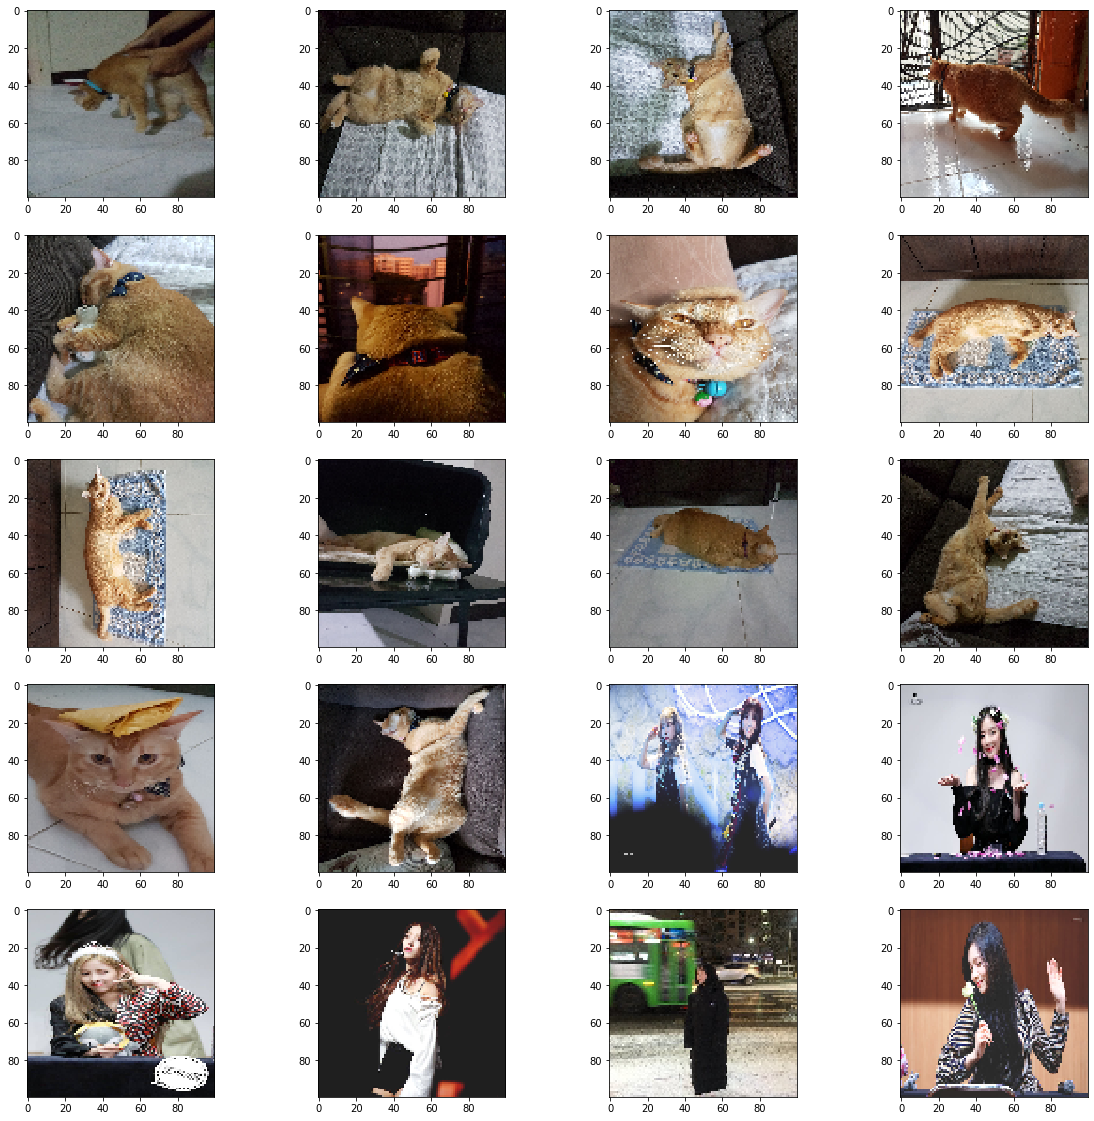

In [55]:
train_neki = dataset["train_x"]
train_neki_label = dataset["train_y"][0]
show_first_20(train_neki,train_neki_label)

IMG 1 is labelled 1
IMG 2 is labelled 1
IMG 3 is labelled 1
IMG 4 is labelled 1
IMG 5 is labelled 1
IMG 6 is labelled 1
IMG 7 is labelled 0
IMG 8 is labelled 0
IMG 9 is labelled 0
IMG 10 is labelled 0
IMG 11 is labelled 0
IMG 12 is labelled 0


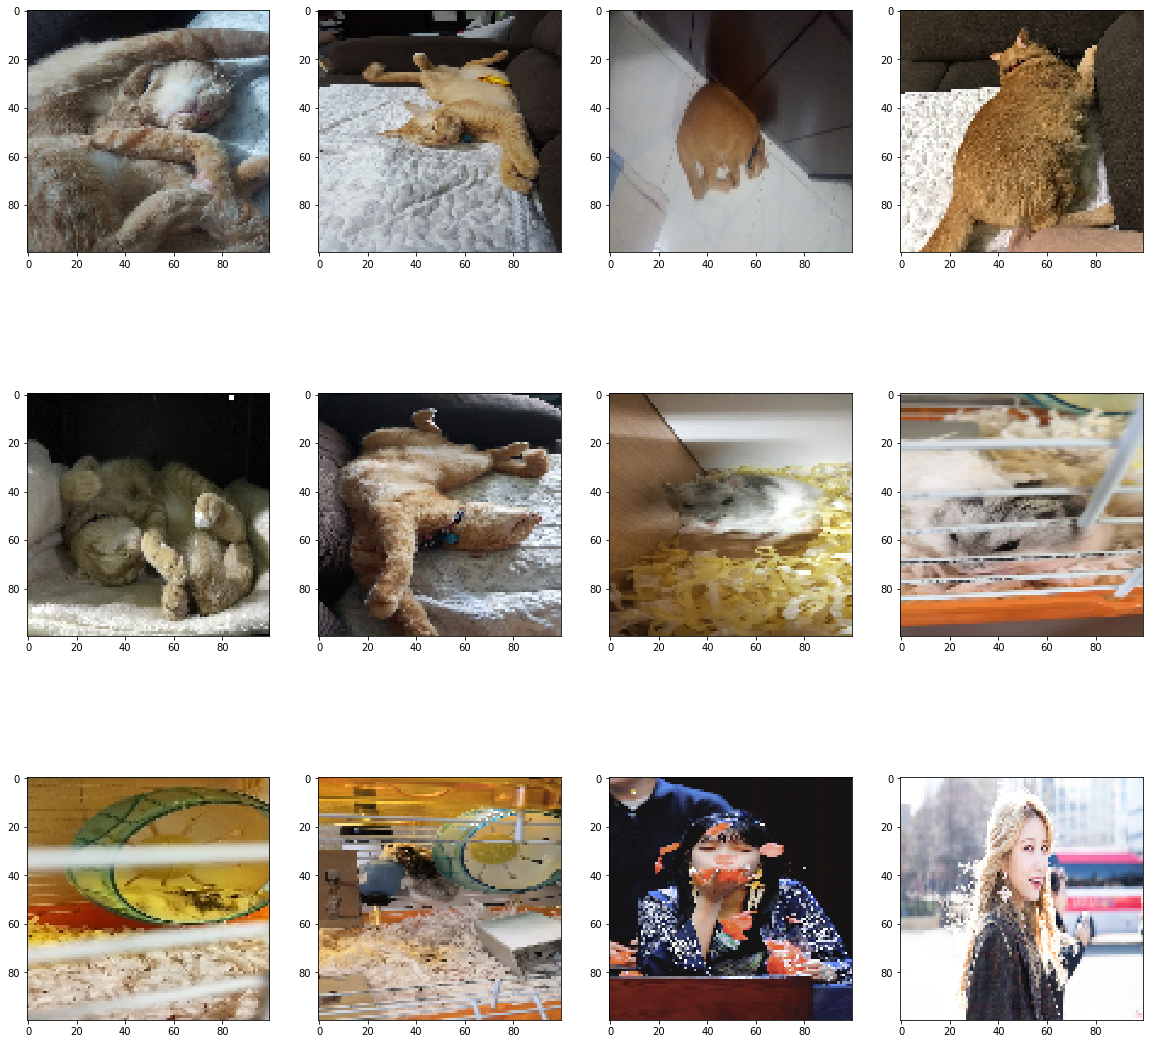

In [54]:
test_neki = dataset["test_x"][:]
test_20_neki_label = dataset["test_y"][0][:]  #cuz its shape is (1,x)
show_first_20(test_neki,test_20_neki_label)

In [6]:
def generate_h5_data(numpy_dataset,keyword):
    """
    I will do the documentation later
    files output are train_{}vnon{}.h5 and test_{}vnon{}.h5
    """
    assert(type(keyword) is str)
    train_filepath = f'./train_{keyword}vnon{keyword}.h5'
    test_filepath = f'./test_{keyword}vnon{keyword}.h5'
    
    h5train = h5py.File(train_filepath, 'w')
    h5train.create_dataset('train_set_x',data= numpy_dataset["train_x"])
    h5train['train_set_y'] = numpy_dataset["train_y"]
    h5train.close()
    
    h5train = h5py.File(test_filepath, 'w')
    h5train.create_dataset('train_set_x',data= numpy_dataset["test_x"])
    h5train['train_set_y'] = numpy_dataset["test_y"]
    h5train.close()
    

In [56]:
generate_h5_data(dataset,"neki")

In [76]:
#####Testing
def review_h5_data(h5filepath,offset=0):
    h5file = h5py.File(h5filepath, "r")
    try:
        x_fieldname,y_fieldname = h5file.keys()
        print("The keys are: ", h5file.keys())
        set_x_orig = np.array(h5file[x_fieldname][:]) # your test set features
        set_y_orig = np.array(h5file[y_fieldname][:]) # your test set labels
        print("The shape of x_field",set_x_orig.shape)
        print("The shape of y_field",set_y_orig.shape)
        show_first_20(set_x_orig,set_y_orig[0],offset)
    finally:
        h5file.close()

The keys are:  <KeysViewHDF5 ['train_set_x', 'train_set_y']>
The shape of x_field (28, 100, 100, 3)
The shape of y_field (1, 28)
IMG 1 is labelled 1
IMG 2 is labelled 1
IMG 3 is labelled 1
IMG 4 is labelled 1
IMG 5 is labelled 1
IMG 6 is labelled 1
IMG 7 is labelled 1
IMG 8 is labelled 1
IMG 9 is labelled 1
IMG 10 is labelled 1
IMG 11 is labelled 1
IMG 12 is labelled 1
IMG 13 is labelled 1
IMG 14 is labelled 1
IMG 15 is labelled 0
IMG 16 is labelled 0
IMG 17 is labelled 0
IMG 18 is labelled 0
IMG 19 is labelled 0
IMG 20 is labelled 0


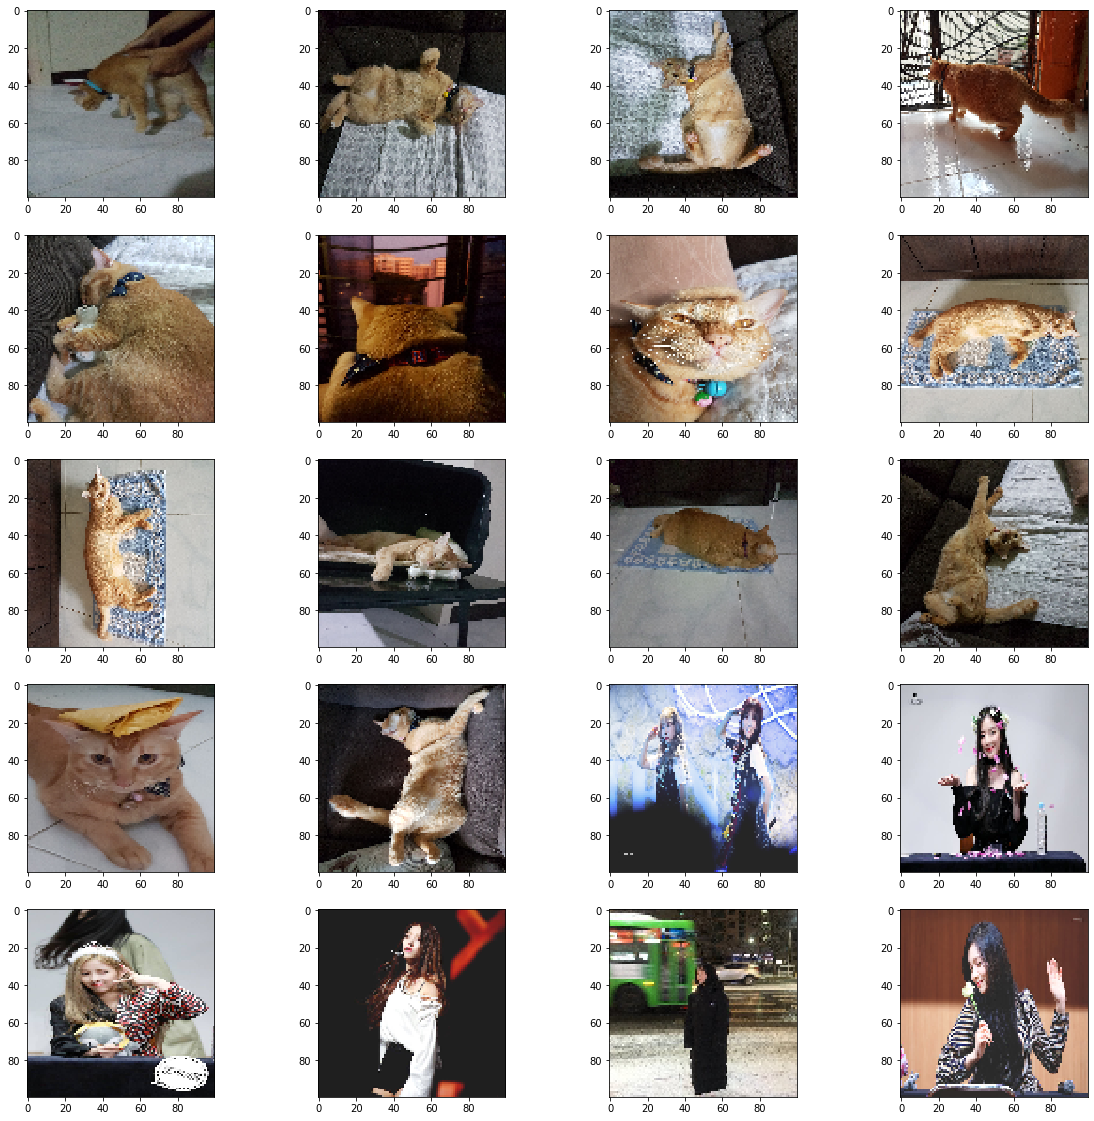

In [70]:
review_h5_data('./train_nekivnonneki.h5')

The keys are:  <KeysViewHDF5 ['train_set_x', 'train_set_y']>
The shape of x_field (12, 100, 100, 3)
The shape of y_field (1, 12)
IMG 1 is labelled 1
IMG 2 is labelled 1
IMG 3 is labelled 1
IMG 4 is labelled 1
IMG 5 is labelled 1
IMG 6 is labelled 1
IMG 7 is labelled 0
IMG 8 is labelled 0
IMG 9 is labelled 0
IMG 10 is labelled 0
IMG 11 is labelled 0
IMG 12 is labelled 0


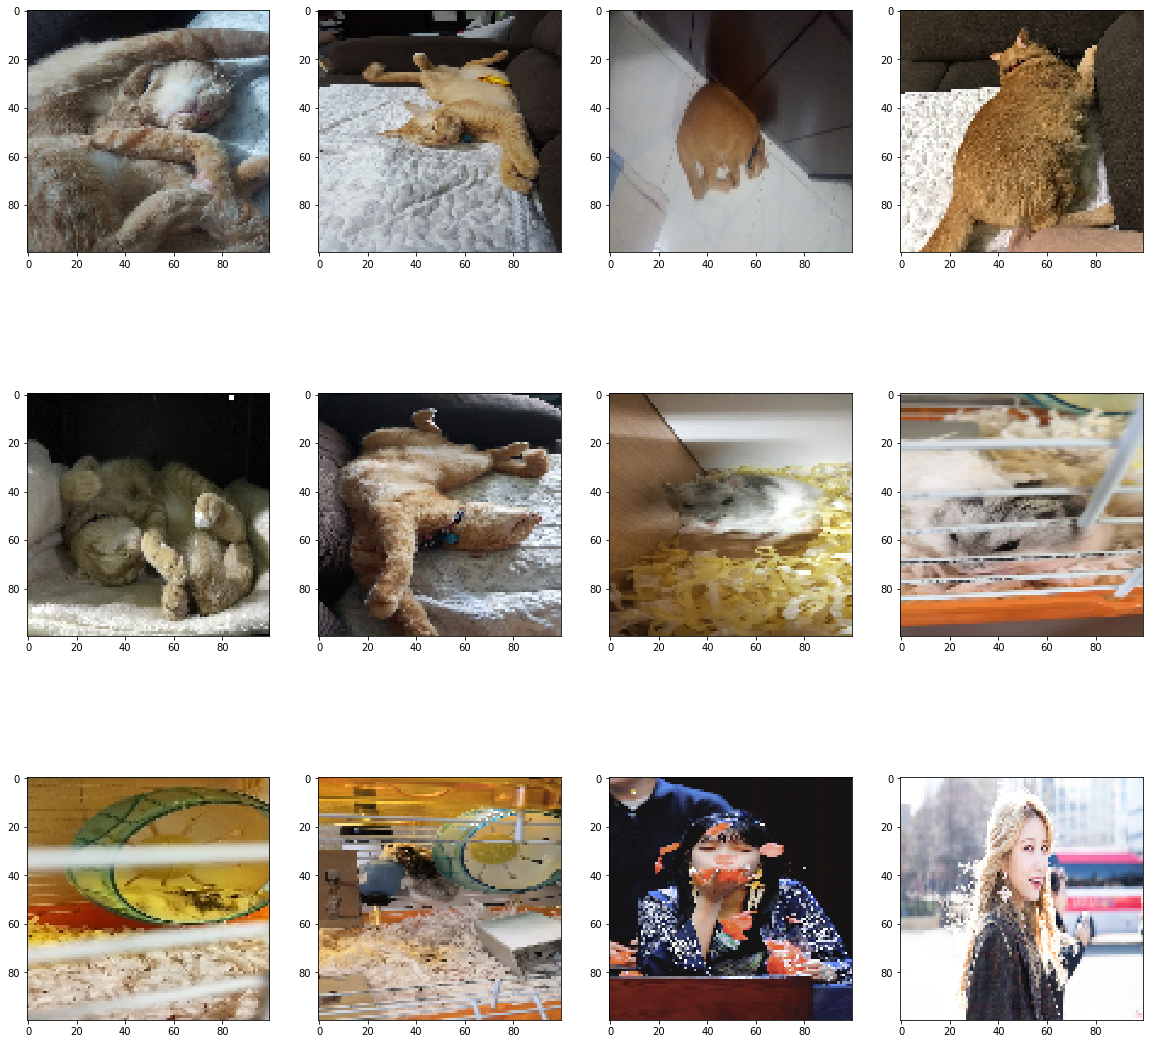

In [71]:
review_h5_data('./test_nekivnonneki.h5')

NOW FOR THE SHOW

In [72]:
nekiset = generate_numpy_data('./neki_data/','./nonneki_data/')  


In [73]:
generate_h5_data(nekiset,"neki")

The keys are:  <KeysViewHDF5 ['train_set_x', 'train_set_y']>
The shape of x_field (238, 100, 100, 3)
The shape of y_field (1, 238)
IMG 1 is labelled 1
IMG 2 is labelled 1
IMG 3 is labelled 1
IMG 4 is labelled 1
IMG 5 is labelled 1
IMG 6 is labelled 1
IMG 7 is labelled 1
IMG 8 is labelled 1
IMG 9 is labelled 1
IMG 10 is labelled 1
IMG 11 is labelled 1
IMG 12 is labelled 1
IMG 13 is labelled 1
IMG 14 is labelled 1
IMG 15 is labelled 1
IMG 16 is labelled 1
IMG 17 is labelled 1
IMG 18 is labelled 1
IMG 19 is labelled 1
IMG 20 is labelled 1


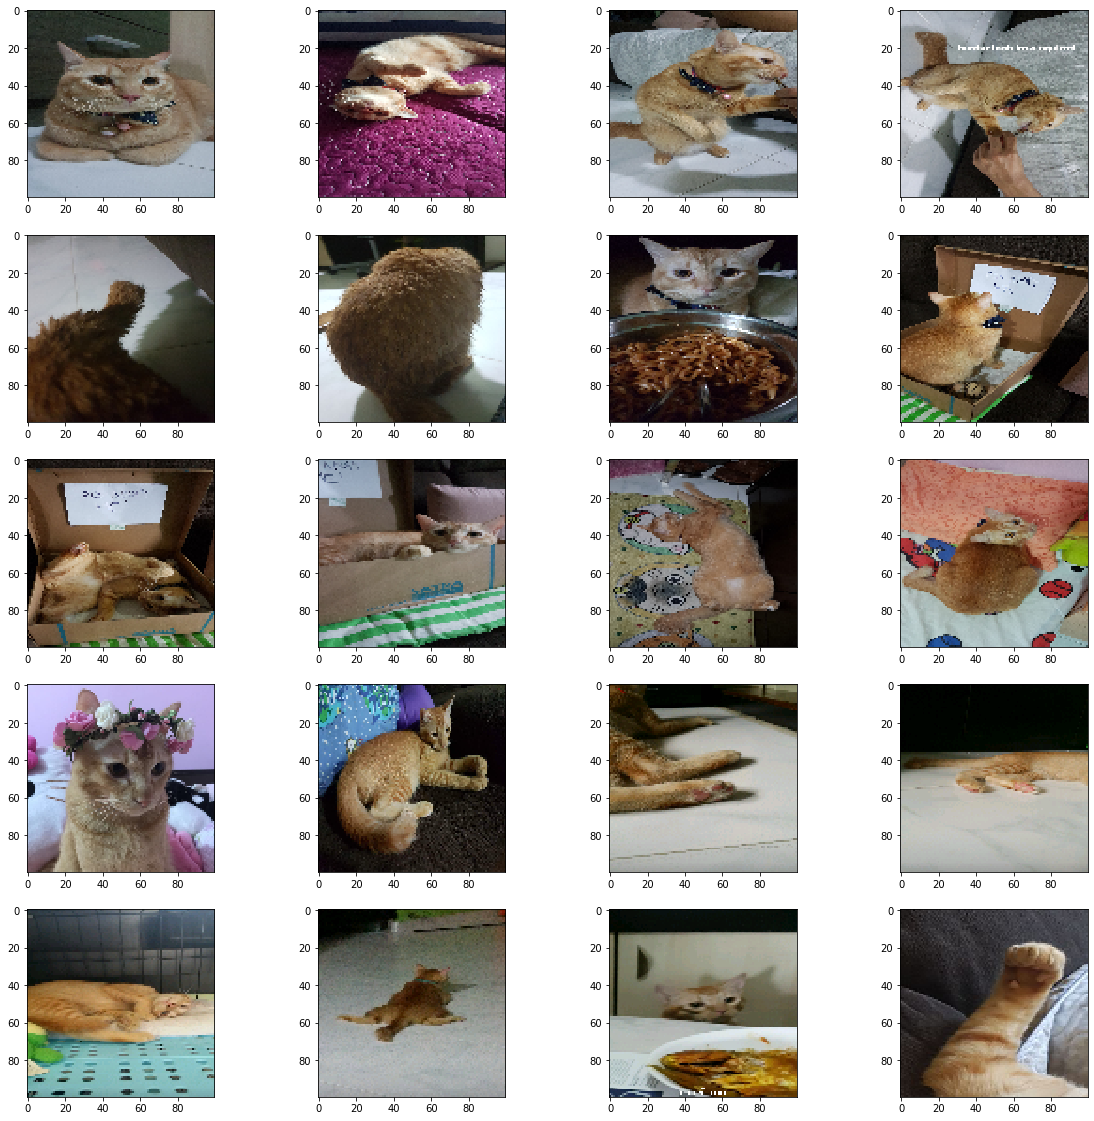

In [82]:
review_h5_data('./test_nekivnonneki.h5',offset = 75)